# Sentiment Modeling Dataset

Build a single monthly dataset that combines PP prices/returns, PP residuals, and OPEC sentiment indices, then run a quick EDA to understand sentiment vs PP before modeling. All inputs are precomputed artifacts; no external APIs are used.

In [1]:
from pathlib import Path
import sys
import warnings

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

NOTEBOOK_DIR = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
ROOT = NOTEBOOK_DIR.parent
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from src.model_dataset_utils import (
    build_modeling_dataset,
    summarize_modeling_dataset,
    plot_pp_vs_opec_index,
    plot_residual_vs_index_scatter,
    plot_leadlag_sentiment_vs_residual,
)

DATA = ROOT / "data"
ART = ROOT / "artifacts"
PLOTS = ROOT / "plots"
for path in (ART, PLOTS):
    path.mkdir(parents=True, exist_ok=True)

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 40)
print(f"ROOT set to {ROOT}")


ROOT set to c:\PythonProjects\LLM-polypropylene


In [2]:
df_model = pd.DataFrame()
meta = {}

try:
    df_model, meta = build_modeling_dataset(ROOT)
except Exception as exc:
    print(f"Failed to build modeling dataset: {exc}")

if df_model.empty:
    print("Modeling dataset is empty; downstream steps will be skipped.")
else:
    print(f"Shape: {df_model.shape}")
    print(f"Date range: {df_model.index.min().date()} to {df_model.index.max().date()}")
    print(f"Columns: {list(df_model.columns)}")
    display(df_model.head())
    display(df_model.tail())
    print("Metadata:", meta)


Loaded monthly prices from c:\PythonProjects\LLM-polypropylene\artifacts\merged_monthly_prices.csv, columns: ['PP', 'PGP', 'CRUDE'], coverage: 2015-01-31 to 2025-03-31
Loaded monthly returns from c:\PythonProjects\LLM-polypropylene\artifacts\merged_monthly_returns.csv, columns: ['PP', 'PGP', 'CRUDE'], coverage: 2015-02-28 to 2025-03-31
Loaded residuals from c:\PythonProjects\LLM-polypropylene\artifacts\pp_idiosyncratic_residual.csv, rows: 119, coverage: 2015-05-31 to 2025-03-31
Loaded OPEC monthly index from c:\PythonProjects\LLM-polypropylene\artifacts\opec_sentiment_monthly_index.csv, columns: ['score_demand', 'score_overall', 'score_price_outlook', 'score_supply', 'index_demand', 'index_overall', 'index_price_outlook', 'index_supply', 'index_hybrid']
Loaded OPEC section scores from c:\PythonProjects\LLM-polypropylene\artifacts\opec_sentiment_monthly_section_scores.csv
OPEC index coverage: 2019-01-31 to 2025-11-30
Modeling dataset shape: (130, 16)
Coverage: 2015-02-28 to 2025-11-30
S

,PP,PGP,CRUDE,ret_PP,ret_PGP,ret_CRUDE,resid_PP,score_demand,score_overall,score_price_outlook,score_supply,index_demand,index_overall,index_price_outlook,index_supply,index_hybrid
2015-02-28,8748.0,8748.0,50.724736,0.054348,0.054348,0.069364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,8829.4,8829.4,47.854091,0.009262,0.009262,-0.058257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,9348.0,9348.0,54.628096,0.057075,0.057075,0.132392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,9142.0,9142.0,59.372000,-0.022283,-0.022283,0.083274,-0.025787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,8786.0,8786.0,59.828637,-0.039720,-0.039720,0.007662,-0.033245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,PP,PGP,CRUDE,ret_PP,ret_PGP,ret_CRUDE,resid_PP,score_demand,score_overall,score_price_outlook,score_supply,index_demand,index_overall,index_price_outlook,index_supply,index_hybrid
2025-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.465910,0.7,0.730664,-0.382759,-13.950573,8.3,33.377305,5.704018,8.357687
2025-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.439590,0.7,0.341918,-0.376988,-14.390164,9.0,33.719222,5.327030,8.414022
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.592581,0.3,0.675067,-0.389453,-14.982745,9.3,34.394289,4.937577,8.412280
2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494205,0.4,0.173203,-0.468063,-15.476949,9.7,34.567492,4.469514,8.315014
2025-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.406237,0.3,-0.027499,-0.509039,-15.883186,10.0,34.539993,3.960475,8.154320


Metadata: {'start_date': '2015-02-28', 'end_date': '2025-11-30', 'n_months': '130', 'columns': 'PP, PGP, CRUDE, ret_PP, ret_PGP, ret_CRUDE, resid_PP, score_demand, score_overall, score_price_outlook, score_supply, index_demand, index_overall, index_price_outlook, index_supply, index_hybrid'}


In [3]:
if df_model.empty:
    print("Skipping dataset export; nothing to save.")
else:
    out_path = ART / "modeling_dataset_monthly.csv"
    df_model.reset_index().rename(columns={"index": "date"}).to_csv(out_path, index=False)
    print(f"Saved modeling dataset -> {out_path}")


Saved modeling dataset -> c:\PythonProjects\LLM-polypropylene\artifacts\modeling_dataset_monthly.csv


In [4]:
summaries = summarize_modeling_dataset(df_model) if not df_model.empty else {}

if not summaries or df_model.empty:
    print('No summaries to display.')
else:
    desc = summaries.get('describe')
    miss = summaries.get('missing')
    corr = summaries.get('corr')

    print('Descriptive stats:')
    display(desc)

    print("\nMissing values:")
    display(miss)

    if corr is not None and not corr.empty:
        print("\nCorrelation matrix:")
        display(corr)

    # Save summaries
    desc_path = ART / 'modeling_dataset_describe.csv'
    miss_path = ART / 'modeling_dataset_missing.csv'
    corr_path = ART / 'modeling_dataset_corr.csv'
    desc.to_csv(desc_path)
    miss.to_csv(miss_path)
    if corr is not None and not corr.empty:
        corr.to_csv(corr_path)
    print(f'Saved summaries to {ART}')


Descriptive stats:


,count,mean,std,min,25%,50%,75%,max
PP,122.0,8.190967e+03,855.627555,6043.600000,7566.737500,8186.000000,8800.062500,10339.250000
PGP,122.0,8.190967e+03,855.627555,6043.600000,7566.737500,8186.000000,8800.062500,10339.250000
CRUDE,122.0,6.232619e+01,17.816844,16.699048,49.058365,60.347045,73.738866,114.339048
ret_PP,122.0,-1.052335e-03,0.042444,-0.131583,-0.023175,-0.001969,0.020649,0.149596
ret_PGP,122.0,-1.052335e-03,0.042444,-0.131583,-0.023175,-0.001969,0.020649,0.149596
ret_CRUDE,122.0,2.963678e-03,0.120098,-0.600585,-0.053332,0.019625,0.056092,0.535517
resid_PP,119.0,1.012262e-16,0.041258,-0.121069,-0.023786,-0.001608,0.017806,0.135678
score_demand,82.0,-1.896560e-01,0.306369,-0.592581,-0.436936,-0.216037,0.022726,0.532321
score_overall,81.0,1.234568e-01,0.560641,-0.900000,-0.400000,0.400000,0.600000,0.800000
score_price_outlook,82.0,4.249247e-01,0.314560,-0.098708,0.166677,0.322499,0.748457,0.980334



Missing values:


,missing_count
PP,8
PGP,8
CRUDE,8
ret_PP,8
ret_PGP,8
ret_CRUDE,8
resid_PP,11
score_demand,48
score_overall,49
score_price_outlook,48



Correlation matrix:


,ret_PP,resid_PP,index_hybrid,index_demand,index_supply,index_price_outlook,ret_CRUDE,ret_PGP
ret_PP,1.000000,9.749861e-01,0.058252,0.031054,0.097761,0.073303,2.097435e-01,1.000000
resid_PP,0.974986,1.000000e+00,0.066762,0.007338,0.097146,0.086681,-1.958379e-16,0.974986
index_hybrid,0.058252,6.676164e-02,1.000000,-0.868254,0.811000,0.953841,-2.396133e-02,0.058252
index_demand,0.031054,7.338081e-03,-0.868254,1.000000,-0.459749,-0.941189,9.918233e-02,0.031054
index_supply,0.097761,9.714554e-02,0.811000,-0.459749,1.000000,0.627322,1.533391e-02,0.097761
index_price_outlook,0.073303,8.668097e-02,0.953841,-0.941189,0.627322,1.000000,-4.561815e-02,0.073303
ret_CRUDE,0.209743,-1.958379e-16,-0.023961,0.099182,0.015334,-0.045618,1.000000e+00,0.209743
ret_PGP,1.000000,9.749861e-01,0.058252,0.031054,0.097761,0.073303,2.097435e-01,1.000000


Saved summaries to c:\PythonProjects\LLM-polypropylene\artifacts


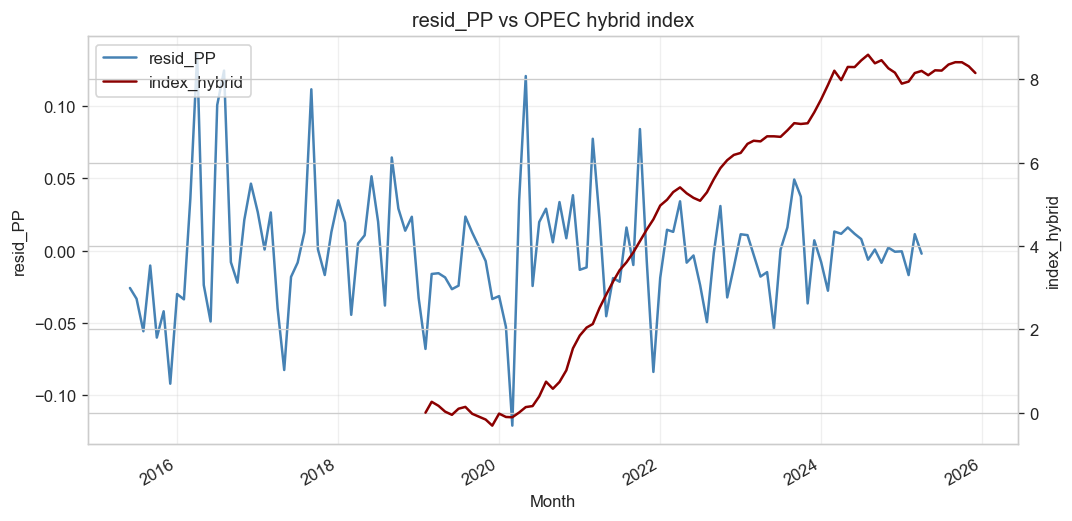

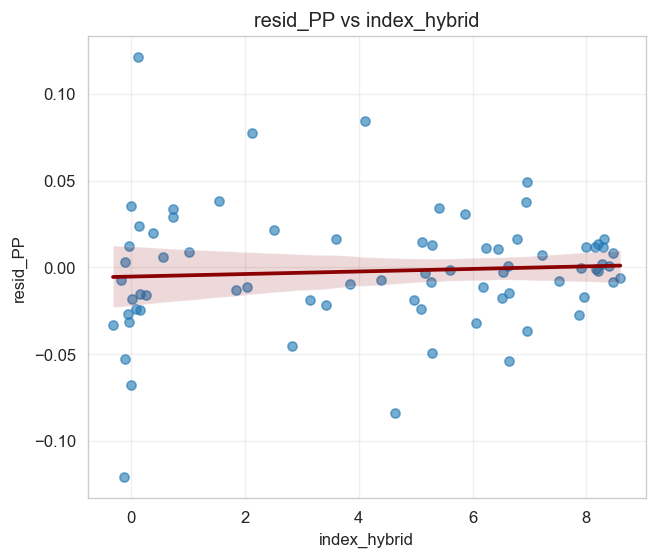

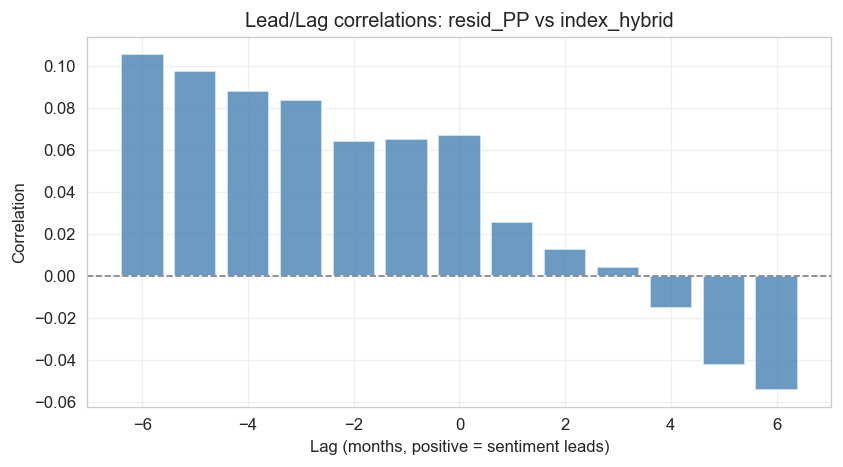

In [5]:
if df_model.empty:
    print("Skipping plots; dataset is empty.")
else:
    # Time-series: PP residuals/returns vs hybrid index
    try:
        fig_ts = plot_pp_vs_opec_index(df_model)
        path_ts = PLOTS / "model_pp_vs_opec_index_timeseries.png"
        fig_ts.savefig(path_ts, dpi=150, bbox_inches="tight")
        display(fig_ts)
    except Exception as exc:
        print(f"Time-series plot failed: {exc}")
    finally:
        plt.close('all')

    # Scatter residuals vs index
    try:
        fig_scatter = plot_residual_vs_index_scatter(df_model)
        path_scatter = PLOTS / "model_pp_residual_vs_opec_index_scatter.png"
        fig_scatter.savefig(path_scatter, dpi=150, bbox_inches="tight")
        display(fig_scatter)
    except Exception as exc:
        print(f"Scatter plot failed: {exc}")
    finally:
        plt.close('all')

    # Lead/lag correlations
    try:
        fig_leadlag = plot_leadlag_sentiment_vs_residual(df_model, max_lag=6)
        path_leadlag = PLOTS / "model_leadlag_residual_index_hybrid.png"
        fig_leadlag.savefig(path_leadlag, dpi=150, bbox_inches="tight")
        display(fig_leadlag)
    except Exception as exc:
        print(f"Lead/lag plot failed: {exc}")
    finally:
        plt.close('all')


In [6]:
if df_model.empty:
    print("No dataset to interpret.")
else:
    start = df_model.index.min().date()
    end = df_model.index.max().date()
    print(f"Modeling dataset spans {start} to {end} with {len(df_model)} months.")
    print("Use these merged features (PP, returns, residuals, OPEC indices) in the next notebook for sentiment-augmented forecasting.")


Modeling dataset spans 2015-02-28 to 2025-11-30 with 130 months.
Use these merged features (PP, returns, residuals, OPEC indices) in the next notebook for sentiment-augmented forecasting.
